# Homework 4 - Part 1

## Does basic house information reflect house's description?

**Scraping and Datasets**

In [10]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import numpy as np

print ("Start : %s" % time.ctime()) 

url="https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza="
counturl=1
npages = 600
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
titles = []
descriptions = []
prices = []
localss = []
surface = []
baths = []
floor = []
while counturl <= npages:
    housesites = []
    goodurl = url+str(counturl)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    for a in soup.find_all('a', href = True,title = True,id = True): 
        housesites.append(a['href'])
    for a in housesites:
        time.sleep( 0.05 )
        try:
            page = requests.get(a)
            soup = BeautifulSoup(page.content, 'html.parser')
            check = soup.find_all('span',attrs = {'class':'text-bold'})[0].get_text() 
            #print(check)
            if "€" in check:
                a = soup.find_all('h1',attrs = {'class':'raleway title-detail'})[0].get_text()
                b = soup.find_all('div',attrs = {'class':'col-xs-12 description-text text-compressed'})[0].get_text()
                c = soup.find_all('li' ,attrs={'class':'features__price'})[0].get_text()
                d = soup.find_all('span',attrs = {'class':'text-bold'})[1].get_text() 
                e = soup.find_all('span',attrs = {'class':'text-bold'})[2].get_text()
                f = soup.find_all('span',attrs = {'class':'text-bold'})[3].get_text()
                g = soup.find_all('abbr',attrs = {'class':'text-bold im-abbr'})[0].get_text()
                c = c.replace("€","")
                g = g.replace("\n","")
                b = b.replace("\n","")
                g = g.replace("T","0")
                titles.append(a)
                descriptions.append(b)
                prices.append(c)
                localss.append(d)
                surface.append(e)
                baths.append(f)
                floor.append(g)

            else:
                a = soup.find_all('h1',attrs = {'class':'raleway title-detail'})[0].get_text()
                b = soup.find_all('div',attrs = {'class':'col-xs-12 description-text text-compressed'})[0].get_text()
                c = soup.find_all('li' ,attrs={'class':'features__price'})[0].get_text()
                d = soup.find_all('span',attrs = {'class':'text-bold'})[0].get_text() 
                e = soup.find_all('span',attrs = {'class':'text-bold'})[1].get_text()
                f = soup.find_all('span',attrs = {'class':'text-bold'})[2].get_text()
                g = soup.find_all('abbr',attrs = {'class':'text-bold im-abbr'})[0].get_text()
                b = b.replace("\n","")
                c = c.replace("€","")
                g = g.replace("\n","")
                g = g.replace("T","0")
                titles.append(a)
                descriptions.append(b)
                prices.append(c)
                localss.append(d)
                surface.append(e)
                baths.append(f)
                floor.append(g)

        except:
            next
    counturl+=1
        
print ("End : %s" % time.ctime())

Start : Sun Dec  9 21:22:19 2018
End : Mon Dec 10 12:55:58 2018


In [11]:
#transform in DataFrame
data_tuples = list(zip(titles,prices,localss,surface,baths,floor))
df = pd.DataFrame(data_tuples,columns = ["Title","Prices","Locals","Area","Bath","Floor"])
pd.set_option('display.max_colwidth', -1)
df.head()

,Title,Prices,Locals,Area,Bath,Floor
0,"Trilocale via del Padiglione 69, Roma",205.000,3,98,1,R
1,"Trilocale via di Vermicino, Roma",205.000,3,98,1,R
2,"Bilocale via della Fanella 31, Roma",230.000,2,52,1,0
3,"Bilocale viale Marconi, Roma",208.000,2,70,1,6
4,"Attico / Mansarda all'asta via della Marranella, Roma",da 22.650,1,1,51,A


In [12]:
use=df.to_csv('result.csv', index=False)  #save announcements in a csv file

In [13]:
len(df)

13198

## Building the TfIdf matrix

Now, we are going to preprocess these 13198 announcements

In [14]:
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer 
from collections import Counter
from collections import defaultdict

In [15]:
words = [] #list with all words from all documents

tfDict = defaultdict(dict)

processedDesc = []
i = 0
for description in descriptions:  
    name = 'announcement'+str(i)
    #we replace the new lines "tags"
    description = description.replace('\\r', ' ')
    description = description.replace('\\n', ' ')
    #tokenize the document, strips out the punctuation
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens_d = tokenizer.tokenize(description)
    #lower case of every word
    tokens_d = [w.lower() for w in tokens_d] 
    #remove stopwords
    stop = set(stopwords.words('italian'))
    tokens_d = [w for w in tokens_d if not w in stop] 
    #stemming
    ps = PorterStemmer()
    tokens_d = [ps.stem(w) for w in tokens_d]
    
    for word in tokens_d: #for every word in the descriptions, put inside a nested dictionary its tf value
        tfDict[name][word] = tokens_d.count(word)/len(tokens_d)
        
    #remove duplicates and append everything to the vocabulary
    tokens_d = set(tokens_d)
        
    i= i+1
    
    for word in tokens_d:
        words.append(word)
        


In [16]:
#with the counter we obtain the number of docs in which every word appears. We did not remove duplicates from the 
#final list of all the words, but we remove duplicates within the descriptions


ndocsWordpresent = Counter(words)
ndocsWordpresent = dict(ndocsWordpresent)


In [17]:
#TF IDF MATRIX COLUMNS : all words
tfIdfcols = set(words)
tfDict['announcement1'].keys()

dict_keys(['via', 'vermicino', 'piu', 'precisament', 'padiglion', '69', 'torvergata', 'enea', 'banca', 'd', 'italia', 'metro', 'esclusiva', 'palazzina', 'cortina', 'videosorvegliata', 'h24', 'ascensor', 'appartamento', 'nuovo', 'piano', 'terra', 'trilocal', 'mq', '85', 'ca', '60', 'giardino', 'terrazzato', 'comprensivo', 'posto', 'auto', 'garag', 'videosorvegliato', 'immobil', 'composto', 'grand', 'salon', 'ingresso', 'cucina', 'vista', 'finestra', '2', 'camer', 'ampio', 'bagno', 'ripostiglio', 'molto', 'ben', 'rifinito', 'accessoriato', 'predisposizion', 'aria', 'condizionata', 'antifurto', 'termoautonomo', 'impianti', 'bticino', 'videocitofono', 'colori', 'serrand', 'elettrich', 'etc', 'prezzo', 'vendita', '205', '000', 'nb', 'immobili', 'regola', 'tutt', 'vigenti', 'norm', 'catastali', 'urbanistich', 'servizio', 'assistenza', 'acquisto', 'seguira', 'particolar', 'cura', 'attenzion', 'durant', 'percorso', 'trattativa', 'fino', 'rogito', 'notaril', 'visionar', 'contattateci', 'numero'

In [39]:
#we need to append the rows with tfIdf scores...
tfIdf = pd.DataFrame(columns = tfIdfcols) #df with columns as words
righe = [] #empty list with all rows

for i in range(10): #for rows: announcements
    announcement = 'announcement'+str(i)
    row = [] #tfidf vector for announcement i
    
    for column in tfIdf.columns: #for columns: words
        
        if(column in tfDict[announcement].keys()): #if word in announcement i - calculate the tfIdf 
            row.append(tfDict[announcement][column]*(13198/ndocsWordpresent[column])) #
        else:
            row.append(0) 
            
    righe.append(row)


In [83]:
#matrix of descriptions/TfIdf as array
X=np.array(righe)
#X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.02423234,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02565777,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02599761,
        0.        ]])

# Clustering

In [22]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist, pdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

To perform k-means++ we need float values. So next we are going to save all values of our matrix in an array,and we'll replace all characters that can't be transformed in float.

In [23]:
df_array = df.values
print(df_array)

[['Trilocale via del Padiglione 69, Roma' ' 205.000' '3\xa0' '98' '1\xa0'
  'R\xa0    ']
 ['Trilocale via di Vermicino, Roma' ' 205.000' '3\xa0' '98' '1\xa0'
  'R\xa0    ']
 ['Bilocale via della Fanella 31, Roma' ' 230.000' '2\xa0' '52' '1\xa0'
  '0\xa0    ']
 ...
 ['Appartamento via Gabrio Casati 32, Roma' ' 299.000' '5\xa0' '140'
  '2\xa0' '0\xa0    ']
 ['Quadrilocale via Giacomo Peroni, Roma' ' 214.000' '4\xa0' '90' '2\xa0'
  '1\xa0    ']
 ['Appartamento via Cardinal De Luca, Roma' ' 800.000' '5\xa0' '153'
  '1\xa0' '3\xa0    ']]


In [24]:
#we are going to replace all characters that can't be transformed in float
df_array=df_array.astype('str') 
df_array = np.char.replace(df_array,'\xa0' , ' ')

In [25]:
df_array=df_array[:,1:]   #we remove the first column of Title

In [26]:
df_array

array([[' 205.000', '3 ', '98', '1 ', 'R     '],
       [' 205.000', '3 ', '98', '1 ', 'R     '],
       [' 230.000', '2 ', '52', '1 ', '0     '],
       ...,
       [' 299.000', '5 ', '140', '2 ', '0     '],
       [' 214.000', '4 ', '90', '2 ', '1     '],
       [' 800.000', '5 ', '153', '1 ', '3     ']], dtype='<U53')

In [28]:
df_array = np.char.replace(df_array,'.' , '')
df_array = np.char.replace(df_array,'A' , '0')
df_array = np.char.replace(df_array,'R' , '0')
df_array = np.char.replace(df_array,'da' , '')
df_array = np.char.replace(df_array,'/' , '')
df_array = np.char.replace(df_array,'+' , '')
df_array = np.char.replace(df_array,'S     ', '0')

df_array=df_array.astype('float') 

## Clustering on first matrix

We run k-means++ clustering on the datasets for a range of values of k and for each value of k we calculate the sum of squared errors (SSE). Then, plot these SSEs for each value of k. The plot will look like an arm, the point where we see the elbow represents the best value of k (the small value of k that still has a low SSE ---> small or null SSE = the data points are similar-then they are a cluster- or the data point is its own cluster)

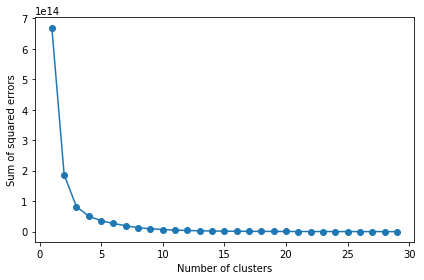

In [30]:
##choose the optimal number of clusters k for k-means++ clustering using the Elbow - method

sse = []  #sum of squared errors/distorsion
for i in range(1, 30):  
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=30, 
                max_iter=300, 
                random_state=0)
    km.fit(df_array)
    sse.append(km.inertia_)
plt.plot(range(1, 30), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.tight_layout()
plt.show()

We choose k=3

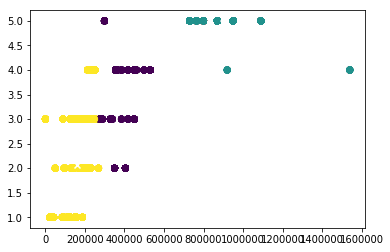

In [32]:
# we choose k=see the elbow

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_array)
labels = kmeans.predict(df_array) #getting the cluster labels
#kmeans.labels_
centroids = kmeans.cluster_centers_   #centroid values
plt.scatter(df_array[:,0],df_array[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)



## Clustering on second matrix

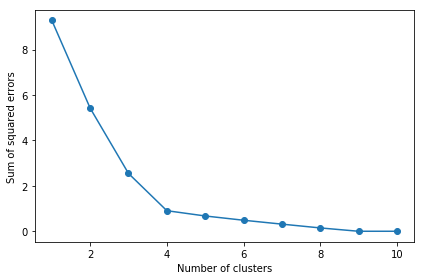

In [41]:
#choose of k
sse1 = []  #sum of squared errors/distorsion
for i in range(1, 11):  #decidere bene valori range
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=11, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    sse1.append(km.inertia_)
plt.plot(range(1, 11), sse1, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

Now, we choose k=4

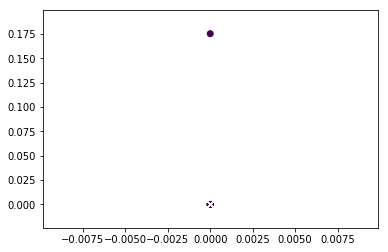

In [42]:
# we choose k=see the elbow

kmeans2 = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans2.predict(X) #getting the cluster labels
#kmeans.labels_
centroids = kmeans2.cluster_centers_   #centroid values
plt.scatter(X[:,0],X[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], 
            kmeans2.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)


**Comparison among cluster**

We expect that both datasets will lead to similar clusters. Is this true?

**Find similar clusters - Jaccard-Similarity**



In [63]:
#Jaccard index [0,1]
def jaccard_sim(str1, str2): 
    a = set(str1) 
    b = set(str2)
    return len(a.intersection(b))/len(b.union(a))

In [69]:
sim=jaccard_sim(kmeans.labels_,kmeans2.labels_)
sim

0.75

In [85]:
#Jaccard distance, measure of dissimilarity between clusters
1-sim

0.25

At a first analysis, it doesn't seem that both datasets lead to similar clusters.

## Word cloud of house descriptions

In [67]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

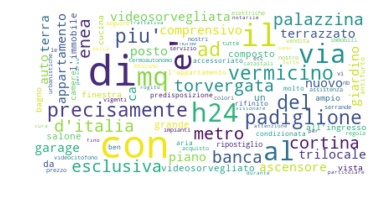

In [81]:
text = str(descriptions[0]) 

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")

# Display the generated image:
plt.axis("off")
plt.show()

In [84]:
# Save the image in the img folder:
wordcloud.to_file("first_description.png")